In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

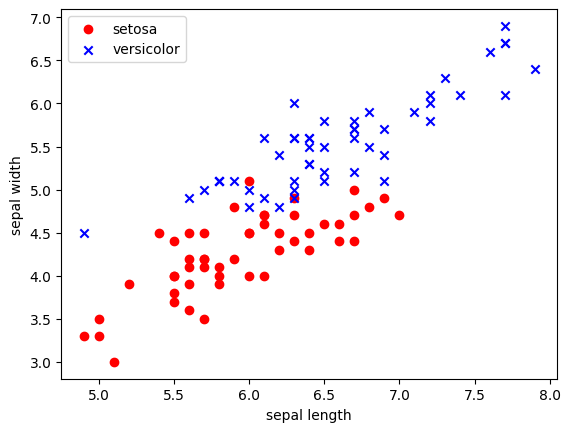

In [14]:
from sklearn.datasets import load_iris
iris=load_iris()
#print(iris.DESCR) #https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0

iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species']=[iris.target_names[i] for i in iris.target]
#iris_df.head()

#y=iris_df.iloc[0:100,4].values
y=iris_df.iloc[50:150,4].values
y=np.where(y=='versicolor',-1,1)
#print(y)

#X=iris_df.iloc[0:100,[0,1]].values
X=iris_df.iloc[50:150,[0,2]].values #[2,3] [0,2]
#print(X)

plt.scatter(X[:50,0],X[:50,1], color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

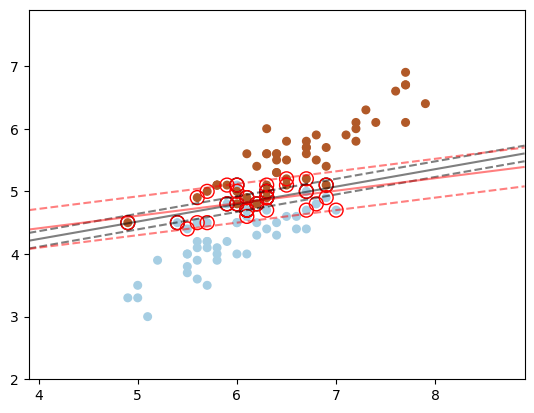

In [16]:
svm1=SVC(kernel='linear', C=10000)
svm1.fit(X,y)

svm2=SVC(kernel='linear', C=1)
svm2.fit(X,y)

#plot_decision_regions(X,y,classifier=svm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(svm1, X, plot_method="contour", colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"], ax=ax)
# plot support vectors
ax.scatter(svm1.support_vectors_[:, 0], svm1.support_vectors_[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")

DecisionBoundaryDisplay.from_estimator(svm2, X, plot_method="contour", colors="r", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"], ax=ax)
# # plot support vectors
ax.scatter(svm2.support_vectors_[:, 0], svm2.support_vectors_[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="r")
plt.show()